# Convolutional Neural Network
Here, we will use CNN to run image classification on pnemonia data.

## Import
---
Importing necessary packages and data

In [35]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import BatchNormalization

import pickle

import os
import gc
from timeit import default_timer as timer

### Image Directories

In [8]:
train_dir = '/Users/arencarpenter/Desktop/Datasets/chest_xray/train'
test_dir = '/Users/arencarpenter/Desktop/Datasets/chest_xray/test'
val_dir = '/Users/arencarpenter/Desktop/Datasets/chest_xray/validation'

In [9]:
# remove unnecessary variables clogging memory
def clean_up(vars_):
    for var in vars_:
        del var 
    print(gc.collect())

## Preprocess
---

In [10]:
train_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(train_dir,
                                                                  target_size = (150,150), 
                                                                  color_mode='grayscale',
                                                                  class_mode='binary')
val_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(val_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')


Found 4043 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


## Baseline Model
---

In [11]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Evaluation Metrics
Since we don't want to miss any true pneumonia case, we will prioritize the recall score.

In [12]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [13]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 7
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 101s 795ms/step - loss: 0.4688 - accuracy: 0.7878 - recall: 0.9630 - val_loss: 0.3309 - val_accuracy: 0.8277 - val_recall: 0.9760
Epoch 2/20
127/127 [==============================] - 86s 674ms/step - loss: 0.2494 - accuracy: 0.8964 - recall: 0.9394 - val_loss: 0.1744 - val_accuracy: 0.9317 - val_recall: 0.9400
Epoch 3/20
127/127 [==============================] - 72s 568ms/step - loss: 0.1647 - accuracy: 0.9354 - recall: 0.9557 - val_loss: 0.1212 - val_accuracy: 0.9475 - val_recall: 0.9773
Epoch 4/20
127/127 [==============================] - 70s 548ms/step - loss: 0.1211 - accuracy: 0.9513 - recall: 0.9670 - val_loss: 0.1000 - val_accuracy: 0.9594 - val_recall: 0.9813
Epoch 5/20
127/127 [==============================] - 67s 526ms/step - loss: 0.1038 - accuracy: 0.9636 - recall: 0.9757 - val_loss: 0.0935 - val_accuracy: 0.9653 - val_recall: 0.9627
Epoch 6/20
127/127 [==============================] - 68s 534ms/step - loss: 0.0917 

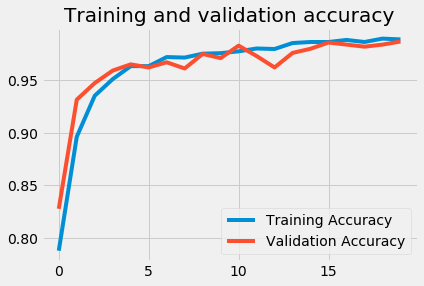

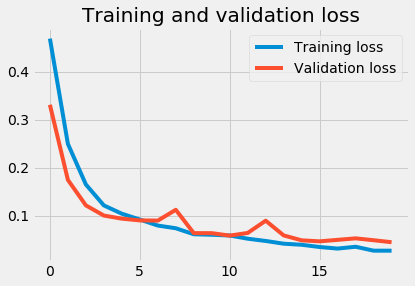

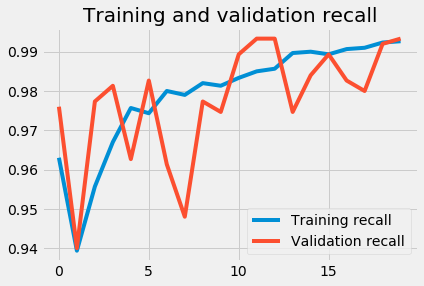

In [14]:
# plot performance
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch

    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, hist_['recall'], label='Training recall')
    plt.plot(epochs, hist_['val_recall'], label='Validation recall')
    plt.title('Training and validation recall')
    plt.legend()
    
    plt.show()
    
plot_performance(history)

In [15]:
# saving model
os.mkdir('MODEL')
model.save('MODEL/baseline_model.h5')

## Basic Network Model 1
---


In [16]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [18]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 97s 764ms/step - loss: 0.3799 - accuracy: 0.8338 - recall: 0.9344 - val_loss: 0.1664 - val_accuracy: 0.9218 - val_recall: 0.9667
Epoch 2/20
127/127 [==============================] - 102s 800ms/step - loss: 0.1523 - accuracy: 0.9401 - recall: 0.9610 - val_loss: 0.1048 - val_accuracy: 0.9545 - val_recall: 0.9747
Epoch 3/20
127/127 [==============================] - 100s 789ms/step - loss: 0.1026 - accuracy: 0.9631 - recall: 0.9783 - val_loss: 0.1000 - val_accuracy: 0.9653 - val_recall: 0.9627
Epoch 4/20
127/127 [==============================] - 101s 798ms/step - loss: 0.0780 - accuracy: 0.9686 - recall: 0.9800 - val_loss: 0.0790 - val_accuracy: 0.9693 - val_recall: 0.9693
Epoch 5/20
127/127 [==============================] - 100s 788ms/step - loss: 0.0656 - accuracy: 0.9730 - recall: 0.9807 - val_loss: 0.0782 - val_accuracy: 0.9743 - val_recall: 0.9800
Epoch 6/20
127/127 [==============================] - 101s 792ms/step - loss: 0.0

## Data Augmentation
---
Run it if the data is generally overfitting.

In [19]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [22]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 50s 393ms/step - loss: 0.0266 - accuracy: 0.9904 - recall: 0.9930 - val_loss: 0.1051 - val_accuracy: 0.9683 - val_recall: 0.9907
Epoch 2/20
127/127 [==============================] - 52s 409ms/step - loss: 0.0254 - accuracy: 0.9904 - recall: 0.9927 - val_loss: 0.0785 - val_accuracy: 0.9772 - val_recall: 0.9840
Epoch 3/20
127/127 [==============================] - 51s 405ms/step - loss: 0.0214 - accuracy: 0.9933 - recall: 0.9957 - val_loss: 0.0893 - val_accuracy: 0.9752 - val_recall: 0.9760
Epoch 4/20
127/127 [==============================] - 54s 429ms/step - loss: 0.0174 - accuracy: 0.9948 - recall: 0.9963 - val_loss: 0.0877 - val_accuracy: 0.9762 - val_recall: 0.9827
Epoch 5/20
127/127 [==============================] - 54s 422ms/step - loss: 0.0154 - accuracy: 0.9958 - recall: 0.9977 - val_loss: 0.0981 - val_accuracy: 0.9752 - val_recall: 0.9760
Epoch 6/20
127/127 [==============================] - 54s 426ms/step - loss: 0.0120 -

## Pretrained Network Method 2
requires GPU

---
### 

In [26]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [28]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 41s 321ms/step - loss: 0.4936 - accuracy: 0.7930 - recall: 0.9880 - val_loss: 0.3377 - val_accuracy: 0.8941 - val_recall: 0.9320
Epoch 2/20
127/127 [==============================] - 42s 334ms/step - loss: 0.2692 - accuracy: 0.8986 - recall: 0.9653 - val_loss: 0.2334 - val_accuracy: 0.9010 - val_recall: 0.9853
Epoch 3/20
127/127 [==============================] - 42s 328ms/step - loss: 0.1991 - accuracy: 0.9253 - recall: 0.9660 - val_loss: 0.2218 - val_accuracy: 0.8990 - val_recall: 0.9880
Epoch 4/20
127/127 [==============================] - 42s 331ms/step - loss: 0.1637 - accuracy: 0.9404 - recall: 0.9660 - val_loss: 0.1921 - val_accuracy: 0.9267 - val_recall: 0.9107
Epoch 5/20
127/127 [==============================] - 42s 333ms/step - loss: 0.1400 - accuracy: 0.9488 - recall: 0.9713 - val_loss: 0.1305 - val_accuracy: 0.9545 - val_recall: 0.9627
Epoch 6/20
127/127 [==============================] - 44s 343ms/step - loss: 0.1317 -

In [29]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [31]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 38s 303ms/step - loss: 0.5399 - accuracy: 0.7447 - recall: 0.9930 - val_loss: 0.4181 - val_accuracy: 0.7663 - val_recall: 0.9960
Epoch 2/20
127/127 [==============================] - 40s 319ms/step - loss: 0.3268 - accuracy: 0.8612 - recall: 0.9637 - val_loss: 0.2597 - val_accuracy: 0.8812 - val_recall: 0.9760
Epoch 3/20
127/127 [==============================] - 41s 321ms/step - loss: 0.2189 - accuracy: 0.9124 - recall: 0.9494 - val_loss: 0.1913 - val_accuracy: 0.9149 - val_recall: 0.9733
Epoch 4/20
127/127 [==============================] - 40s 315ms/step - loss: 0.1628 - accuracy: 0.9387 - recall: 0.9630 - val_loss: 0.1772 - val_accuracy: 0.9228 - val_recall: 0.9827
Epoch 5/20
127/127 [==============================] - 42s 333ms/step - loss: 0.1381 - accuracy: 0.9448 - recall: 0.9637 - val_loss: 0.1319 - val_accuracy: 0.9436 - val_recall: 0.9813
Epoch 6/20
127/127 [==============================] - 42s 327ms/step - loss: 0.1201 -

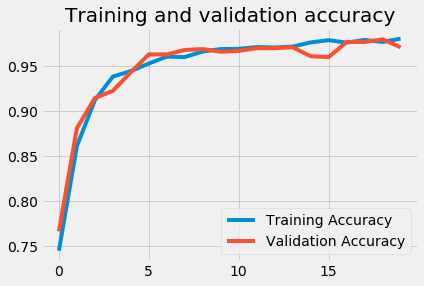

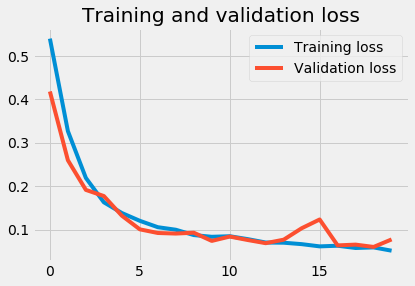

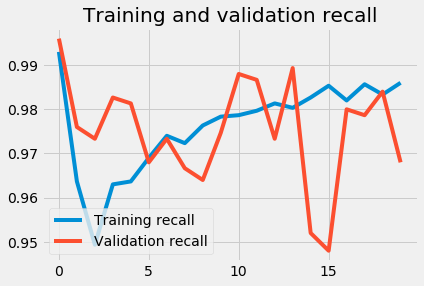

In [32]:
plot_performance(history)

In [33]:
model.save('MODEL/3c4d64.h5')

### Batch Norm

In [36]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [38]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 8
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 85s 668ms/step - loss: 0.2153 - accuracy: 0.9401 - recall: 0.9580 - val_loss: 1.1117 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 2/20
127/127 [==============================] - 89s 701ms/step - loss: 0.0661 - accuracy: 0.9797 - recall: 0.9863 - val_loss: 2.4291 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 3/20
127/127 [==============================] - 91s 714ms/step - loss: 0.0287 - accuracy: 0.9891 - recall: 0.9927 - val_loss: 3.4327 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 4/20
127/127 [==============================] - 90s 711ms/step - loss: 0.0222 - accuracy: 0.9933 - recall: 0.9953 - val_loss: 2.2558 - val_accuracy: 0.7446 - val_recall: 1.0000
Epoch 5/20
127/127 [==============================] - 90s 709ms/step - loss: 0.0076 - accuracy: 0.9973 - recall: 0.9983 - val_loss: 0.4523 - val_accuracy: 0.8921 - val_recall: 0.9987
Epoch 6/20
127/127 [==============================] - 90s 712ms/step - loss: 0.0080 -

In [42]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [44]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=10, 
                    validation_data=val_g, 
                    workers = 6
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/10
127/127 [==============================] - 92s 721ms/step - loss: 0.2024 - accuracy: 0.9389 - recall: 0.9567 - val_loss: 1.4839 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 2/10
127/127 [==============================] - 93s 732ms/step - loss: 0.0654 - accuracy: 0.9780 - recall: 0.9833 - val_loss: 3.7567 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 3/10
127/127 [==============================] - 93s 733ms/step - loss: 0.0441 - accuracy: 0.9861 - recall: 0.9893 - val_loss: 4.8973 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 4/10
127/127 [==============================] - 92s 723ms/step - loss: 0.0233 - accuracy: 0.9904 - recall: 0.9937 - val_loss: 2.4882 - val_accuracy: 0.7564 - val_recall: 1.0000
Epoch 5/10
127/127 [==============================] - 98s 769ms/step - loss: 0.0147 - accuracy: 0.9955 - recall: 0.9970 - val_loss: 0.6152 - val_accuracy: 0.9079 - val_recall: 0.9987
Epoch 6/10
127/127 [==============================] - 95s 751ms/step - loss: 0.0111 -

In [45]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', 'Recall'])

In [47]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=10, 
                    validation_data=val_g, 
                    workers = 6
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/10
127/127 [==============================] - 82s 645ms/step - loss: 0.3396 - accuracy: 0.9268 - recall: 0.9464 - val_loss: 9.9174 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 2/10
127/127 [==============================] - 87s 687ms/step - loss: 0.0776 - accuracy: 0.9733 - recall: 0.9823 - val_loss: 8.3805 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 3/10
127/127 [==============================] - 91s 713ms/step - loss: 0.0534 - accuracy: 0.9822 - recall: 0.9870 - val_loss: 4.0520 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 4/10
127/127 [==============================] - 90s 707ms/step - loss: 0.0512 - accuracy: 0.9839 - recall: 0.9890 - val_loss: 1.5277 - val_accuracy: 0.7693 - val_recall: 1.0000
Epoch 5/10
127/127 [==============================] - 89s 701ms/step - loss: 0.0508 - accuracy: 0.9829 - recall: 0.9887 - val_loss: 0.1245 - val_accuracy: 0.9584 - val_recall: 0.9453
Epoch 6/10
127/127 [==============================] - 89s 702ms/step - loss: 0.0230 -

In [48]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', 'Recall'])

In [50]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=20, 
                    validation_data=val_g, 
                    workers = 7
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
127/127 [==============================] - 62s 486ms/step - loss: 0.3242 - accuracy: 0.8427 - recall: 0.9360 - val_loss: 0.1557 - val_accuracy: 0.9347 - val_recall: 0.9867
Epoch 2/20
127/127 [==============================] - 64s 505ms/step - loss: 0.1250 - accuracy: 0.9520 - recall: 0.9653 - val_loss: 0.1046 - val_accuracy: 0.9624 - val_recall: 0.9573
Epoch 3/20
127/127 [==============================] - 67s 531ms/step - loss: 0.0862 - accuracy: 0.9654 - recall: 0.9760 - val_loss: 0.0847 - val_accuracy: 0.9653 - val_recall: 0.9813
Epoch 4/20
127/127 [==============================] - 66s 518ms/step - loss: 0.0727 - accuracy: 0.9713 - recall: 0.9793 - val_loss: 0.0673 - val_accuracy: 0.9812 - val_recall: 0.9827
Epoch 5/20
127/127 [==============================] - 66s 521ms/step - loss: 0.0562 - accuracy: 0.9812 - recall: 0.9870 - val_loss: 0.0815 - val_accuracy: 0.9762 - val_recall: 0.9907
Epoch 6/20
127/127 [==============================] - 64s 505ms/step - loss: 0.0435 -

In [51]:
model.save('MODEL/4c1d512_adam.h5')